# <center> Market basket Optimization

#### The aim of this project is to identify associations or relationships between items purchased together in transactions.

In [1]:
# Import librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('market_basket_dataset.csv')
df

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255
...,...,...,...,...,...
495,1493,Juice,2,4.24,55321
496,1493,Bread,5,7.05,14479
497,1497,Coffee,3,2.01,25378
498,1497,Pasta,3,2.64,53334


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      500 non-null    int64  
 1   Itemname    500 non-null    object 
 2   Quantity    500 non-null    int64  
 3   Price       500 non-null    float64
 4   CustomerID  500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB


In [4]:
df.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


In [5]:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

In [6]:
unique_value = df.nunique().astype(object)
unique_value

BillNo        153
Itemname       19
Quantity        5
Price         378
CustomerID    499
dtype: object

In [7]:
# Display unique values for each column in a more readable format
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"Unique values in column '{column}':")
    for val in unique_vals:
        print(f"  - {val}")
    print("\n")

Unique values in column 'BillNo':
  - 1000
  - 1004
  - 1005
  - 1008
  - 1011
  - 1012
  - 1013
  - 1021
  - 1024
  - 1027
  - 1033
  - 1035
  - 1038
  - 1042
  - 1044
  - 1049
  - 1054
  - 1056
  - 1063
  - 1066
  - 1073
  - 1075
  - 1076
  - 1082
  - 1086
  - 1088
  - 1101
  - 1104
  - 1105
  - 1106
  - 1109
  - 1111
  - 1112
  - 1115
  - 1120
  - 1127
  - 1132
  - 1139
  - 1140
  - 1144
  - 1152
  - 1153
  - 1160
  - 1162
  - 1169
  - 1170
  - 1172
  - 1176
  - 1185
  - 1186
  - 1190
  - 1194
  - 1196
  - 1198
  - 1203
  - 1205
  - 1207
  - 1211
  - 1214
  - 1215
  - 1217
  - 1219
  - 1220
  - 1222
  - 1225
  - 1226
  - 1230
  - 1231
  - 1233
  - 1235
  - 1236
  - 1242
  - 1243
  - 1250
  - 1252
  - 1254
  - 1264
  - 1266
  - 1267
  - 1268
  - 1271
  - 1279
  - 1280
  - 1282
  - 1283
  - 1285
  - 1287
  - 1290
  - 1292
  - 1293
  - 1297
  - 1301
  - 1302
  - 1304
  - 1310
  - 1311
  - 1312
  - 1313
  - 1320
  - 1331
  - 1332
  - 1333
  - 1334
  - 1336
  - 1339
  - 1343
  - 1348
  -

In [8]:
transactions = df.groupby('BillNo')['Itemname'].apply(list)
transactions.head()

BillNo
1000    [Apples, Butter, Eggs, Potatoes]
1004                           [Oranges]
1005              [Milk, Onions, Cereal]
1008        [Tomatoes, Potatoes, Cereal]
1011                           [Bananas]
Name: Itemname, dtype: object

In [9]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Perform one-hot encoding 
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions).astype(int)
df_trans = pd.DataFrame(te_data, columns = te.columns_)
df_trans.head()

,Apples,Bananas,Bread,Butter,Cereal,Cheese,Chicken,Coffee,Eggs,Juice,Milk,Onions,Oranges,Pasta,Potatoes,Sugar,Tea,Tomatoes,Yogurt
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Finding frequent items using Apriori algorithm
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_trans, min_support = 0.05, use_colnames = True)
Frequent_itemsets = frequent_itemsets.sort_values(by = 'support', ascending = False)
print(frequent_itemsets.head())

    support   itemsets
0  0.163399   (Apples)
1  0.241830  (Bananas)
2  0.150327    (Bread)
3  0.163399   (Butter)
4  0.202614   (Cereal)


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.5)
rules = rules.sort_values(by = 'lift', ascending = False)
print(rules)

  antecedents consequents  antecedent support  consequent support   support  \
0      (Milk)   (Oranges)            0.156863            0.189542  0.078431   

   confidence      lift  leverage  conviction  zhangs_metric  
0         0.5  2.637931  0.048699    1.620915       0.736434  


Summary: The rule (Milk)=>(Oranges) suggests that when customers buy milk, they are 2.64 times more likely to buy oranges as well. This rule applies to 7.84% of all transactions, and when milk is bought, there is a 50% chance that oranges will also be purchased.

# Visualization 

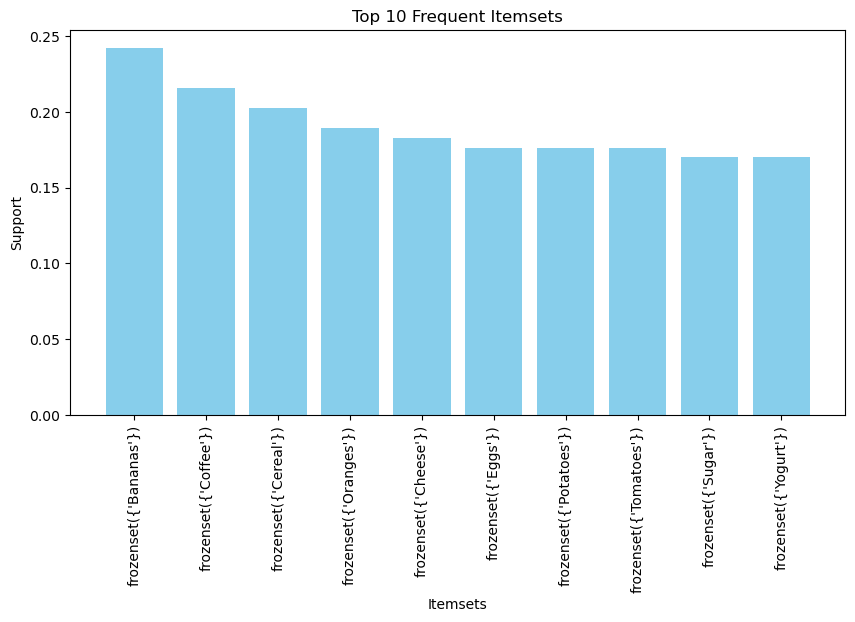

In [12]:
# Visualizing popular items

plt.figure(figsize = (10,5))
top_items = frequent_itemsets.nlargest(10, 'support')
plt.bar(top_items['itemsets'].astype(str), top_items['support'], color = 'skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Top 10 Frequent Itemsets')
plt.show()

In [13]:
# Create a cross-selling matrix to display item 

cross_sell_matrix = df_trans.T.dot(df_trans)
cross_sell_matrix

,Apples,Bananas,Bread,Butter,Cereal,Cheese,Chicken,Coffee,Eggs,Juice,Milk,Onions,Oranges,Pasta,Potatoes,Sugar,Tea,Tomatoes,Yogurt
Apples,25,2,7,4,3,6,5,5,4,2,7,4,4,6,7,9,5,6,8
Bananas,2,37,7,9,9,8,8,6,7,8,6,6,8,8,10,7,5,8,7
Bread,7,7,23,8,6,6,6,11,2,5,6,6,9,6,9,5,5,5,6
Butter,4,9,8,25,7,6,7,5,8,8,7,3,7,3,9,2,8,7,5
Cereal,3,9,6,7,31,12,7,8,7,5,5,10,5,6,7,2,6,7,4
Cheese,6,8,6,6,12,28,3,7,5,5,6,9,9,4,5,6,7,6,7
Chicken,5,8,6,7,7,3,20,3,4,5,3,5,6,8,8,3,2,7,3
Coffee,5,6,11,5,8,7,3,33,6,9,6,7,7,9,8,8,8,5,9
Eggs,4,7,2,8,7,5,4,6,27,7,4,5,3,6,7,4,4,8,5
Juice,2,8,5,8,5,5,5,9,7,23,4,4,4,4,8,4,8,5,6


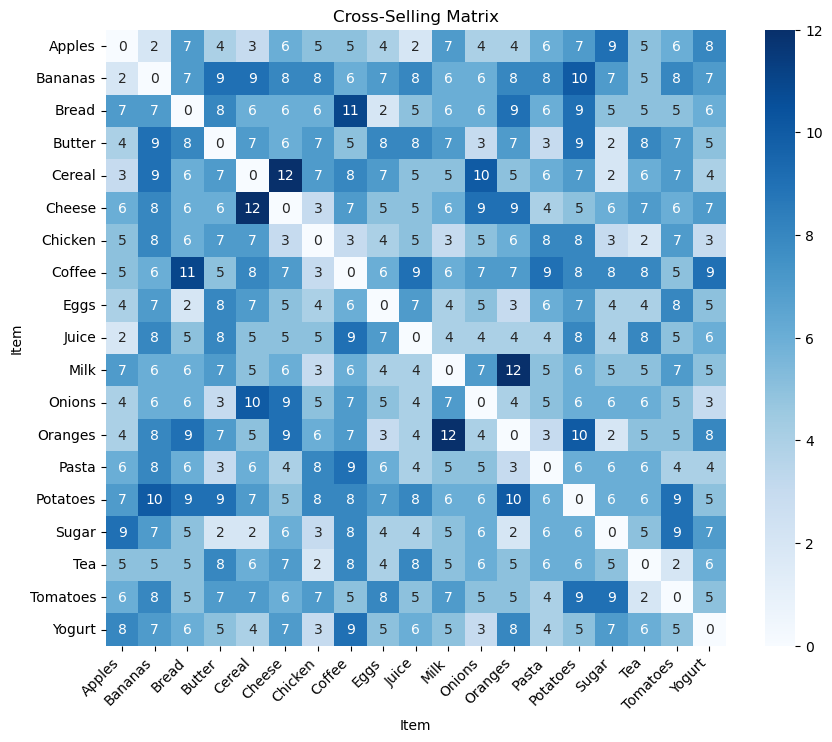

In [15]:
# Setting diagonal to zero for clearer visualization

np.fill_diagonal(cross_sell_matrix.values, 0)

# Plot the cross-selling matrix
plt.figure(figsize = (10, 8))
sns.heatmap(cross_sell_matrix, cmap = 'Blues', annot = True, fmt = 'd')
plt.xlabel('Item')
plt.ylabel('Item')
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.title("Cross-Selling Matrix")
plt.show()

This chart shows how often different items were purchased together.

In [ ]:
`